In [80]:
import pandas as pd
df = pd.read_csv('Data/brasileiro_2018_2020.csv')
df

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,6137,Série A,2018.0,2018-04-14,Cruzeiro,0.0,1.0,Grêmio,VV,0.0,3.0,1.0
1,6138,Série A,2018.0,2018-04-14,Vitória,2.0,2.0,Flamengo,E,1.0,1.0,2.0
2,6139,Série A,2018.0,2018-04-14,Santos,2.0,0.0,Ceará,VC,3.0,0.0,3.0
3,6140,Série A,2018.0,2018-04-15,Athletico-PR,5.0,1.0,Chapecoense,VC,3.0,0.0,8.0
4,6141,Série A,2018.0,2018-04-15,Vasco,2.0,1.0,Atlético-MG,VC,3.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,7272,Série A,2020.0,2021-02-25,Vasco,3.0,2.0,Goiás,VC,3.0,0.0,104.0
1136,7273,Série A,2020.0,2021-02-25,Internacional,0.0,0.0,Corinthians,E,1.0,1.0,108.0
1137,7274,Série A,2020.0,2021-02-25,Atlético-MG,2.0,0.0,Palmeiras,VC,3.0,0.0,107.0
1138,7275,Série A,2020.0,2021-02-25,São Paulo,2.0,1.0,Flamengo,VC,3.0,0.0,105.0


In [74]:
teams = ['Corinthians', 'São Paulo', 'Santos', 'Palmeiras']

classicos = ((df['Casa'].isin(['Corinthians', 'Palmeiras', 'São Paulo', 'Santos']))
              & (df['Fora'].isin(['Corinthians', 'Palmeiras', 'São Paulo', 'Santos'])))
classicos = df[classicos]

derby = ((df['Casa'].isin(['Corinthians', 'Palmeiras']))
              & (df['Fora'].isin(['Corinthians', 'Palmeiras'])))
derby = df[derby]

majestoso = ((df['Casa'].isin(['Corinthians', 'São Paulo']))
              & (df['Fora'].isin(['Corinthians', 'São Paulo'])))
majestoso = df[majestoso]

alvinegro = ((df['Casa'].isin(['Corinthians', 'Santos']))
              & (df['Fora'].isin(['Corinthians', 'Santos'])))
alvinegro = df[alvinegro]

choque_rei = ((df['Casa'].isin(['Palmeiras', 'São Paulo']))
              & (df['Fora'].isin(['Palmeiras', 'São Paulo'])))
choque_rei = df[choque_rei]

pal_x_san = ((df['Casa'].isin(['Palmeiras', 'Santos']))
              & (df['Fora'].isin(['Palmeiras', 'Santos'])))
pal_x_san = df[pal_x_san]

sansao = ((df['Casa'].isin(['São Paulo', 'Santos']))
              & (df['Fora'].isin(['São Paulo', 'Santos'])))
sansao = df[sansao]


In [75]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Partidas': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Partidas'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 2
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Partidas': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Partidas'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 2
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time'})
    team_stats_df = team_stats_df.sort_values(by='Pontos', ascending=False)

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual de Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual de Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual de Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 2
    team_stats_df['Percentual de Pontos'] = (team_stats_df['Pontos'] / max_possible_points) * 100

    return team_stats_df

# Example usage:
classicos_stats = update_team_stats(classicos)
derby_stats = update_team_stats(derby)
majestoso_stats = update_team_stats(majestoso)
alvinegro_stats = update_team_stats(alvinegro)
choque_rei_stats = update_team_stats(choque_rei)
pal_x_san_stats = update_team_stats(pal_x_san)
sansao_stats = update_team_stats(sansao)
print(classicos_stats)
print(derby_stats)
print(majestoso_stats)
print(choque_rei_stats)
print(pal_x_san_stats)
print(sansao_stats)

          Time  Partidas  Vitórias  Derrotas  Empates  Gols  Pontos  \
1    Palmeiras        18         9         3        6  31.0      24   
2    São Paulo        18         6         6        6  19.0      18   
3       Santos        18         5         5        8  19.0      18   
0  Corinthians        18         3         9        6  10.0      12   

   Percentual de Vitórias  Percentual de Empates  Percentual de Derrotas  \
1               50.000000              33.333333               16.666667   
2               33.333333              33.333333               33.333333   
3               27.777778              44.444444               27.777778   
0               16.666667              33.333333               50.000000   

   Percentual de Pontos  
1             66.666667  
2             50.000000  
3             50.000000  
0             33.333333  
          Time  Partidas  Vitórias  Derrotas  Empates  Gols  Pontos  \
1    Palmeiras         6         3         1        2   9.0   

In [76]:
# Your original DataFrame
data = {'Time': ['Corinthians', 'Palmeiras', 'São Paulo', 'Santos'],
        'Corinthians': [0, derby_stats.loc[derby_stats['Time'] == 'Palmeiras', 'Vitórias'].values[0], 
                             majestoso_stats.loc[majestoso_stats['Time'] == 'São Paulo', 'Vitórias'].values[0],
                            alvinegro_stats.loc[alvinegro_stats['Time'] == 'Santos', 'Vitórias'].values[0]],
        
        'Palmeiras': [ derby_stats.loc[derby_stats['Time'] == 'Corinthians', 'Vitórias'].values[0],  0,
                        choque_rei_stats.loc[choque_rei_stats['Time'] == 'São Paulo', 'Vitórias'].values[0],
                            pal_x_san_stats.loc[pal_x_san_stats['Time'] == 'Santos', 'Vitórias'].values[0]],
        'São Paulo': [majestoso_stats.loc[majestoso_stats['Time'] == 'Corinthians', 'Vitórias'].values[0],
                      choque_rei_stats.loc[choque_rei_stats['Time'] == 'Palmeiras', 'Vitórias'].values[0], 0,
                      sansao_stats.loc[sansao_stats['Time'] == 'Santos', 'Vitórias'].values[0]],
        'Santos': [alvinegro_stats.loc[alvinegro_stats['Time'] == 'Corinthians', 'Vitórias'].values[0],
                      pal_x_san_stats.loc[pal_x_san_stats['Time'] == 'Palmeiras', 'Vitórias'].values[0],
                      sansao_stats.loc[sansao_stats['Time'] == 'São Paulo', 'Vitórias'].values[0], 0],
        
       'Total': [classicos_stats.loc[classicos_stats['Time'] == 'Corinthians', 'Vitórias'].values[0],
                 classicos_stats.loc[classicos_stats['Time'] == 'Palmeiras', 'Vitórias'].values[0],
                 classicos_stats.loc[classicos_stats['Time'] == 'São Paulo', 'Vitórias'].values[0],
                classicos_stats.loc[classicos_stats['Time'] == 'Santos', 'Vitórias'].values[0]]}
new_df = pd.DataFrame(data)

# Set 'Time' column as the index
new_df = new_df.set_index('Time')

# Display the DataFrame
print(new_df)


             Corinthians  Palmeiras  São Paulo  Santos  Total
Time                                                         
Corinthians            0          1          2       0      3
Palmeiras              3          0          3       3      9
São Paulo              3          1          0       2      6
Santos                 3          1          1       0      5


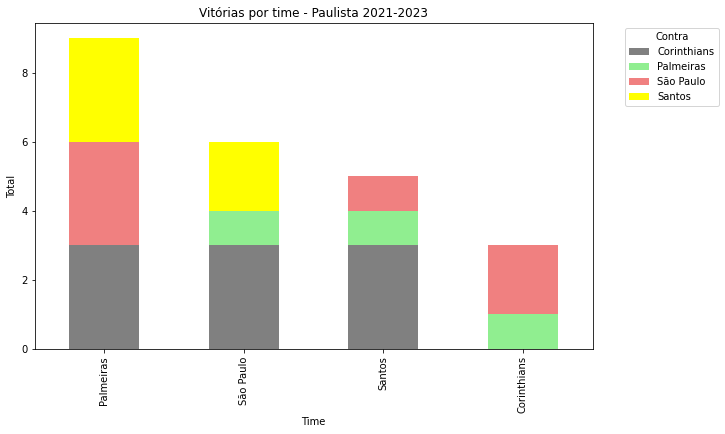

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named new_df
# Sort the DataFrame by the 'Total' column in descending order
new_df_sorted = new_df.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for the bar plot
df_plot = new_df_sorted.drop('Total', axis=1)

# Define a color palette (you can customize this)
colors = ['gray', 'lightgreen', 'lightcoral', 'yellow']

# Plot the stacked bar graph with the specified color palette
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_ylabel('Total')
ax.set_title('Vitórias por time - Paulista 2021-2023')
ax.legend(title='Contra', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
